# Import Dependencies

In [38]:
import cv2
import os
import logging
import time
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt

## Detecting Keypoints using MP Holistic

In [39]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [40]:
def setup_holistic_detection():
    # Initialize Camera Input
    cap = cv2.VideoCapture(0)

    # Set Up MediaPipe Holistic Model
    holistic = mp_holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    )

    return cap, holistic

In [41]:
def process_mp_frames(frame, holistic):
    # Opencv records in BGR while mediapipe supports RGB
    # We need to recolor frame to RGB to support MediaPipe processing
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  # Make Image non-writeable for performance
    results = holistic.process(image)              # process image and return object contain landmarks
    image.flags.writeable = True                   # Back to writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color back to BGR for OpenCV 

    return image, results

In [42]:
def draw_landmarks(image, results):
    # Draw face landmarks
    mp_drawing.draw_landmarks(image, 
                              results.face_landmarks, 
                              mp_holistic.FACEMESH_TESSELATION, # FACEMESH_CONTOURS could also be valid here
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(170,86,0), thickness=1, circle_radius=2),
                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
    # Draw pose connections
    mp_drawing.draw_landmarks(image, 
                              results.pose_landmarks, 
                              mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, 
                              results.left_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(), 
                              connection_drawing_spec=mp_drawing_styles.get_default_hand_connections_style())
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, 
                              results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(), 
                              connection_drawing_spec=mp_drawing_styles.get_default_hand_connections_style())
    

In [43]:
def run_holistic_detection():
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow loggin
    logging.getLogger('mediapipe').setLevel(logging.ERROR)  # Only show errors from mediapipe
    cap, holistic = setup_holistic_detection()

    while cap.isOpened():
        # Read frame
        ret, frame = cap.read()
        if not ret:
            print('camera stopped: no frames grabbed')
            break

        # Process Frame/Make dectections
        image, results = process_mp_frames(frame, holistic)
        # print(results)

        # Draw Landmarks
        draw_landmarks(image, results)

        # Extract Keypoints
        # when ready

        # Show to screen
        cv2.imshow('ASL Detection', image)

        # Exit on 'q' press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            draw_landmarks(frame, results)
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            break

    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1742929152.870513 16028276 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1 Pro
W0000 00:00:1742929152.952872 16042569 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742929152.967169 16042571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742929152.969987 16042575 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742929152.970108 16042576 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742929152.970302 16042571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disablin

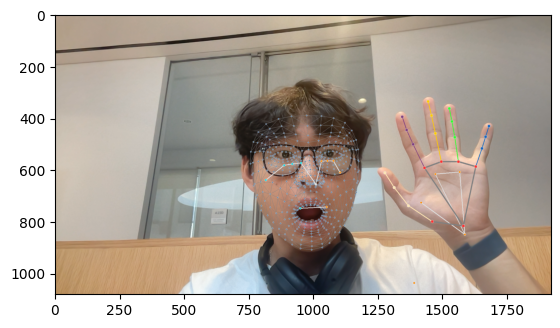

In [44]:
run_holistic_detection()